In [ ]:
!pip install -U vnstock

In [ ]:
from vnstock import *

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [ ]:
# Lấy dữ liệu lịch sử cổ phiếu
df = stock_historical_data(symbol="VIB", start_date="2023-01-01", end_date="2024-04-05", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df

,time,open,high,low,close,volume,ticker
0,2023-01-03,14360,15080,14360,15080,2386500,VIB
1,2023-01-04,15140,15450,15000,15080,2527100,VIB
2,2023-01-05,15080,15260,15040,15220,1760900,VIB
3,2023-01-06,15300,15790,15140,15600,5142600,VIB
4,2023-01-09,15760,16400,15760,16020,4565900,VIB
...,...,...,...,...,...,...,...
308,2024-04-01,24400,24600,23950,24300,5853200,VIB
309,2024-04-02,24050,24300,23550,24100,11610200,VIB
310,2024-04-03,24100,24100,23500,23550,8770800,VIB
311,2024-04-04,23550,23700,23200,23200,7718000,VIB


In [ ]:
df.tail()

,time,open,high,low,close,volume,ticker
308,2024-04-01,24400,24600,23950,24300,5853200,VIB
309,2024-04-02,24050,24300,23550,24100,11610200,VIB
310,2024-04-03,24100,24100,23500,23550,8770800,VIB
311,2024-04-04,23550,23700,23200,23200,7718000,VIB
312,2024-04-05,22900,23050,22600,22700,7370900,VIB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    313 non-null    object
 1   open    313 non-null    int64 
 2   high    313 non-null    int64 
 3   low     313 non-null    int64 
 4   close   313 non-null    int64 
 5   volume  313 non-null    int64 
 6   ticker  313 non-null    object
dtypes: int64(5), object(2)
memory usage: 17.2+ KB


In [ ]:
df.describe()

,open,high,low,close,volume
count,313.000000,313.000000,313.000000,313.000000,3.130000e+02
mean,18910.150160,19104.504792,18691.968051,18890.856230,4.855064e+06
std,1999.724625,2011.801040,1955.858959,1996.136711,3.107665e+06
min,14360.000000,15080.000000,14360.000000,15080.000000,1.234800e+06
25%,17250.000000,17460.000000,17060.000000,17250.000000,2.871700e+06
50%,18760.000000,18950.000000,18560.000000,18710.000000,4.194100e+06
75%,20120.000000,20360.000000,19970.000000,20120.000000,5.757300e+06
max,24500.000000,25000.000000,24000.000000,24600.000000,2.715280e+07


In [ ]:
df['return'] = np.log(df.close.pct_change()+1)

In [ ]:
def lag_price(df, lags):
  index = []
  for i in range(1, lags+1):
    df['Lag_Price_'+str(i)] = df['return'].shift(i)
    index.append('Lag_Price_'+str(i))
  return index

In [ ]:
lagsname = lag_price(df, 10)
lagsname

['Lag_Price_1',
 'Lag_Price_2',
 'Lag_Price_3',
 'Lag_Price_4',
 'Lag_Price_5',
 'Lag_Price_6',
 'Lag_Price_7',
 'Lag_Price_8',
 'Lag_Price_9',
 'Lag_Price_10']

In [ ]:
df

,time,open,high,low,close,volume,ticker,return,Lag_Price_1,Lag_Price_2,Lag_Price_3,Lag_Price_4,Lag_Price_5,Lag_Price_6,Lag_Price_7,Lag_Price_8,Lag_Price_9,Lag_Price_10
0,2023-01-03,14360,15080,14360,15080,2386500,VIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-04,15140,15450,15000,15080,2527100,VIB,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-05,15080,15260,15040,15220,1760900,VIB,0.009241,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-06,15300,15790,15140,15600,5142600,VIB,0.024661,0.009241,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-09,15760,16400,15760,16020,4565900,VIB,0.026567,0.024661,0.009241,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2024-04-01,24400,24600,23950,24300,5853200,VIB,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230,0.065669,-0.006764,-0.011173
309,2024-04-02,24050,24300,23550,24100,11610200,VIB,-0.008265,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230,0.065669,-0.006764
310,2024-04-03,24100,24100,23500,23550,8770800,VIB,-0.023086,-0.008265,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230,0.065669
311,2024-04-04,23550,23700,23200,23200,7718000,VIB,-0.014974,-0.023086,-0.008265,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230


In [ ]:
df.dropna(inplace=True)
df

,time,open,high,low,close,volume,ticker,return,Lag_Price_1,Lag_Price_2,Lag_Price_3,Lag_Price_4,Lag_Price_5,Lag_Price_6,Lag_Price_7,Lag_Price_8,Lag_Price_9,Lag_Price_10
11,2023-01-18,17530,17560,17270,17340,3544300,VIB,0.000000,0.026886,0.010721,0.012048,0.027091,0.002431,0.000000,0.026567,0.024661,0.009241,0.000000
12,2023-01-19,17130,17380,17080,17340,4654000,VIB,0.000000,0.000000,0.026886,0.010721,0.012048,0.027091,0.002431,0.000000,0.026567,0.024661,0.009241
13,2023-01-27,17650,17810,17500,17680,3768100,VIB,0.019418,0.000000,0.000000,0.026886,0.010721,0.012048,0.027091,0.002431,0.000000,0.026567,0.024661
14,2023-01-30,17760,17840,17470,17470,4444500,VIB,-0.011949,0.019418,0.000000,0.000000,0.026886,0.010721,0.012048,0.027091,0.002431,0.000000,0.026567
15,2023-01-31,17420,17840,17130,17840,7272500,VIB,0.020958,-0.011949,0.019418,0.000000,0.000000,0.026886,0.010721,0.012048,0.027091,0.002431,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2024-04-01,24400,24600,23950,24300,5853200,VIB,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230,0.065669,-0.006764,-0.011173
309,2024-04-02,24050,24300,23550,24100,11610200,VIB,-0.008265,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230,0.065669,-0.006764
310,2024-04-03,24100,24100,23500,23550,8770800,VIB,-0.023086,-0.008265,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230,0.065669
311,2024-04-04,23550,23700,23200,23200,7718000,VIB,-0.014974,-0.023086,-0.008265,-0.012270,0.014330,0.002064,-0.006179,0.016564,-0.010384,-0.004124,0.029230


In [ ]:
# chia data ra thành 2 phần: x là input, y là output
x = df[lagsname].values
y = df['close'].values

In [ ]:
x

array([[ 0.02688648,  0.01072077,  0.01204834, ...,  0.02466056,
         0.00924099,  0.        ],
       [ 0.        ,  0.02688648,  0.01072077, ...,  0.02656703,
         0.02466056,  0.00924099],
       [ 0.        ,  0.        ,  0.02688648, ...,  0.        ,
         0.02656703,  0.02466056],
       ...,
       [-0.00826451, -0.01227009,  0.01432983, ..., -0.00412372,
         0.02922964,  0.0656691 ],
       [-0.02308602, -0.00826451, -0.01227009, ..., -0.01038431,
        -0.00412372,  0.02922964],
       [-0.01497354, -0.02308602, -0.00826451, ...,  0.01656353,
        -0.01038431, -0.00412372]])

In [ ]:
y

array([17340, 17340, 17680, 17470, 17840, 17870, 17870, 18400, 17900,
       17470, 17560, 17420, 16620, 15990, 16219, 16390, 16540, 17020,
       17420, 17250, 16620, 17020, 16620, 16260, 16260, 16700, 16620,
       16350, 16300, 16300, 16390, 16790, 16580, 16390, 16030, 16930,
       16540, 16580, 16260, 16430, 16390, 16350, 16540, 16700, 16790,
       16790, 16930, 16850, 17170, 17500, 17420, 17210, 16930, 16880,
       17010, 17250, 17090, 16840, 16840, 16730, 16560, 16520, 16400,
       16450, 16280, 16360, 16480, 16480, 16400, 16360, 16520, 16400,
       16690, 16690, 16600, 16930, 16880, 16880, 17420, 17330, 17500,
       17250, 17010, 16930, 17050, 17250, 17250, 17330, 17460, 18670,
       18790, 19120, 19120, 18510, 18950, 19030, 18950, 18880, 18750,
       18710, 18710, 18880, 18880, 19200, 19390, 19390, 19240, 19290,
       19200, 19100, 19100, 19100, 19340, 19050, 19240, 19730, 19730,
       19540, 19630, 19680, 19830, 19970, 19970, 19930, 19970, 20410,
       20360, 20220,

In [ ]:
# Chia data thành 2 phần: 1 phần để train data, 1 phần để test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# Linear Regression Model
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([17076.77162874, 13225.82122343, 23702.46708612, 12275.39644249,
       10477.03075112,  7358.88286627, 18610.0190846 , 12488.45756662,
        9934.41537406, 12478.27862919])

In [ ]:
regressor.intercept_

18795.666507345133

In [ ]:
prediction = regressor.predict(x_test)

In [ ]:
prediction

array([17755.61631578, 19280.9141512 , 20093.99301836, 20143.75702569,
       19085.92940358, 19048.02324953, 17308.06795622, 18616.93390391,
       18903.24608887, 17941.96205002, 18841.65738706, 19748.51593497,
       18613.12311893, 18345.79088023, 19214.6848292 , 18881.81974556,
       18713.67339297, 17654.92877825, 18456.21898012, 19280.30551681,
       18496.71271767, 19211.63594378, 19300.98685186, 19521.74423809,
       18535.22391735, 18558.89917287, 18406.87071616, 18643.2337783 ,
       17772.7805582 , 19095.13648449, 19296.52521793, 18678.12978931,
       18836.28175938, 17990.68691644, 17630.20079361, 19945.32143759,
       18433.89783535, 18874.47481716, 19321.73791686, 18201.36194611,
       19227.66799086, 19506.58108171, 18607.92736654, 17346.79445028,
       19795.72021785, 18930.54212083, 19213.9080603 , 18723.80467532,
       20269.63557845, 17117.53851085, 18568.36460166, 20934.38317544,
       18363.46581277, 19858.27586345, 19027.83519427, 19254.43793377,
      

In [ ]:
data = pd.DataFrame({'Thực tế': y_test.flatten(), 'Dự đoán': prediction.flatten()})

In [ ]:
data.head()

,Thực tế,Dự đoán
0,18900,17755.616316
1,17460,19280.914151
2,20360,20093.993018
3,20310,20143.757026
4,19100,19085.929404


In [ ]:
data.head(30)

,Thực tế,Dự đoán
0,18900,17755.616316
1,17460,19280.914151
2,20360,20093.993018
3,20310,20143.757026
4,19100,19085.929404
5,20120,19048.023250
6,17590,17308.067956
7,20020,18616.933904
8,22000,18903.246089
9,16300,17941.962050


In [ ]:
# Tính mse và rmse
import math
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Squared Error: 3410810.2954736287
Root Mean Squared Error: 1846.837918030066


<Axes: >

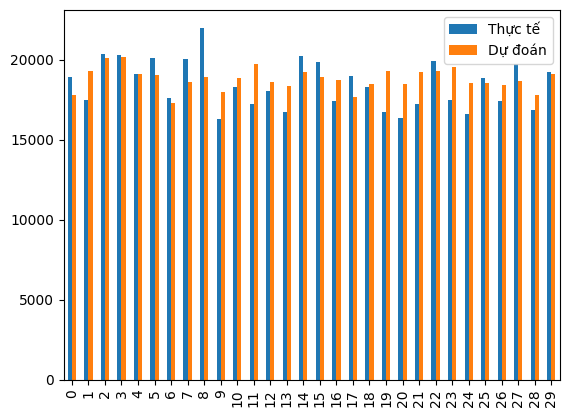

In [ ]:
graph = data.head(30)
graph.plot(kind='bar')

In [ ]:
data.tail(30)

,Thực tế,Dự đoán
61,21090,19482.723111
62,19390,19117.343680
63,19680,19214.893018
64,20360,20491.180111
65,19540,19229.592408
66,24200,20357.527248
67,16430,18417.038488
68,23550,19779.456635
69,18670,18758.855655
70,20800,18604.287521


<Axes: >

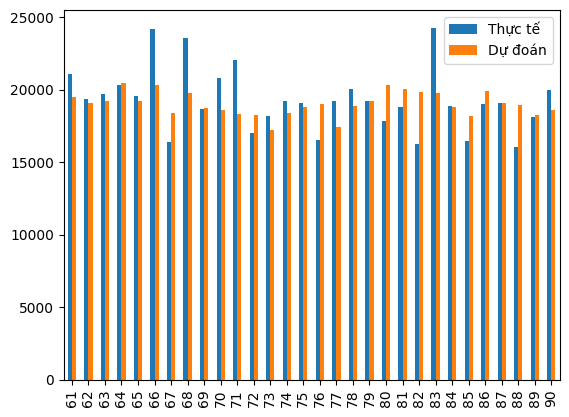

In [ ]:
graph = data.tail(30)
graph.plot(kind='bar')

In [ ]:
regressor.score(x_test, y_test)

0.0717769841022069

In [ ]:
predicted = regressor.predict(x)
print(predicted)

[20934.38317544 20547.07597502 20507.03351781 20524.33045987
 19795.72021785 20303.09056787 20148.67657585 19964.02872422
 20010.45208276 19560.89773955 18900.78705801 18713.67339297
 18535.22391735 17716.81873429 17751.97799807 17063.00803291
 17117.53851085 18284.1617066  18406.87071616 18552.77374273
 18618.19254883 18320.13181412 18531.4295101  18115.32551977
 19210.14561291 18783.25534353 18921.49344331 18496.71271767
 18851.27990403 17941.96205002 17655.20121367 18549.23795106
 19018.29788848 18848.3556535  18949.42302577 18343.23925707
 19039.3192553  18365.48113581 19816.6994271  18417.03848829
 18832.13217565 18235.70383827 19050.45271901 18728.14676321
 19010.02328924 19427.21020792 18876.5806744  19207.16200182
 18860.6899901  19668.33159841 19667.55141842 19748.51593497
 19528.53372344 18970.53349497 18605.01042964 18815.41712978
 19349.9315501  18986.53208731 18836.28175938 18345.79088023
 17985.76160068 18150.69317147 18363.46581277 18249.07280179
 18344.1717528  18199.03

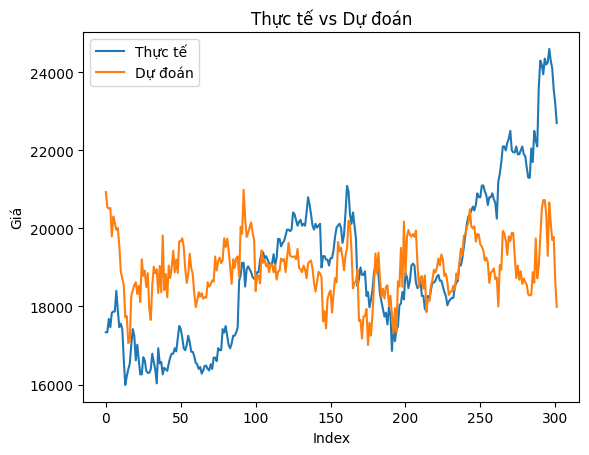

In [ ]:
plt.plot(y, label="Thực tế")
plt.plot(predicted, label="Dự đoán")
plt.xlabel("Index")
plt.ylabel("Giá")
plt.title("Thực tế vs Dự đoán")
plt.legend()
plt.show()